In [1]:
cd ..

/Users/deepakduggirala/Documents/autonomous-robotics/bev-generation


In [2]:
import json
from pathlib import Path
import zlib

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import lmdb

from utils import bytes_to_array
import utils
import nusc_utils

In [3]:
dataroot = Path('/Users/deepakduggirala/Documents/autonomous-robotics/v1.0-mini/').resolve()
gt_db_path = dataroot / Path('lmdb/samples/GT_BEV_360')
gt_db = lmdb.open(path=str(gt_db_path), readonly=True)

In [4]:
def db_value_to_array(value):
    value_unzipped = zlib.decompress(value)
    return bytes_to_array(value_unzipped)

In [5]:
keys = []
with gt_db.begin() as txn:
    for key,_ in txn.cursor():
        keys.append(key)
len(keys)

404

In [6]:
i = 101
# key = keys[i]

key = bytes('356d81f38dd9473ba590f39e266f54e5', 'utf-8')

with gt_db.begin() as txn:
    value = txn.get(key)
    bev_gt = db_value_to_array(value)
bev_gt.shape

(15, 400, 200)

### Visualizing GT and RAW BEVs

In [7]:
nusc_idx_to_color = {
    0: (0, 207, 191),
    1: (175, 0, 75),
    2: (75, 0, 75),
    3: (112, 180, 60),
    4: (255, 158, 0),
    5: (255, 99, 71),
    6: (255, 69, 0),
    7: (255, 140, 0),
    8: (233, 150, 70),
    9: (138, 43, 226),
    10: (255, 61, 99),
    11: (220, 20, 60),
    12: (47, 79, 79),
    13: (112, 128, 144)
}
color_map_gt = {i + 1: c for i, c in nusc_idx_to_color.items()}
color_map_gt[0] = [255, 255, 255]  # color areas without any class as white
color_map_gt[2] = color_map_gt[1]  # color ped_crossing with same color as drivable_area
color_map_gt[4] = [255, 255, 255]  # do not color "carpark_area" - will be white
# color_map[15] = [255, 255, 255]  # do not color "lidar mask"


In [8]:
bev_gt_map_cmp = utils.make_composite(bev_gt[:-1,:,:]) # do not apply visible (lidar + fov) mask
bev_gt_map_cmp_color = utils.color_components(bev_gt_map_cmp, color_map=color_map_gt)

(-0.5, 199.5, 399.5, -0.5)

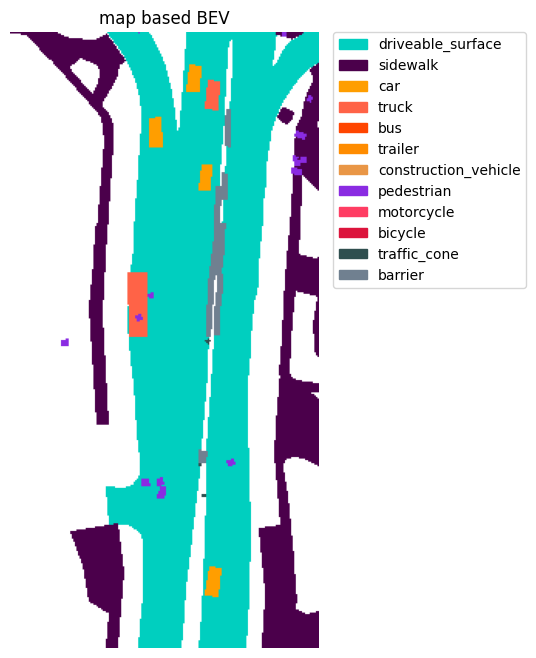

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(np.flip(bev_gt_map_cmp_color, 0))
ax.set_title('map based BEV')
ax.axis('off')

legend_colors = [np.append(np.array(nusc_idx_to_color[idx]) / 255, 1) for idx in range(len(nusc_idx_to_color))]
patches = [mpatches.Patch(color=legend_colors[i], label=label)
           for i, label in enumerate(nusc_utils.NUSC_LIDAR_CLASS_NAMES) if i not in [1, 3]]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.axis('off')